In [58]:
%matplotlib inline

In [59]:
import pytpc
import pytpc.simulation
from pytpc.constants import pi, degrees

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [60]:
data_path = '../../data/real/'
filename = 'run_0130.h5'
file = pytpc.HDFDataFile(data_path + filename, 'r')

In [61]:
labels = pd.read_csv(data_path+'run_0130_labels.csv', sep=',')

#no 'iffy' events
#p_indices = labels.loc[(labels['label'] == 'p') & (labels['iffy'] != 0)]['evt_id'].index[:]

#all events
p_indices = labels.loc[(labels['label'] == 'p')]['evt_id'].index[:]

print(p_indices)

Int64Index([  12,   24,   31,   55,   60,   65,   67,   70,   72,   78,
            ...
             976,  978,  980,  984,  989,  993,  994,  998, 1000, 1001],
           dtype='int64', length=215)


In [62]:
print(labels['label'].value_counts())

j     564
p     215
c     128
pp     61
pc     34
Name: label, dtype: int64


In [63]:
labels2 = pd.read_csv(data_path+'run_0130_labels.csv', sep=',')
print(labels2['label'].value_counts())

j     564
p     215
c     128
pp     61
pc     34
Name: label, dtype: int64


In [86]:
i = 0

83


(-275, 275)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


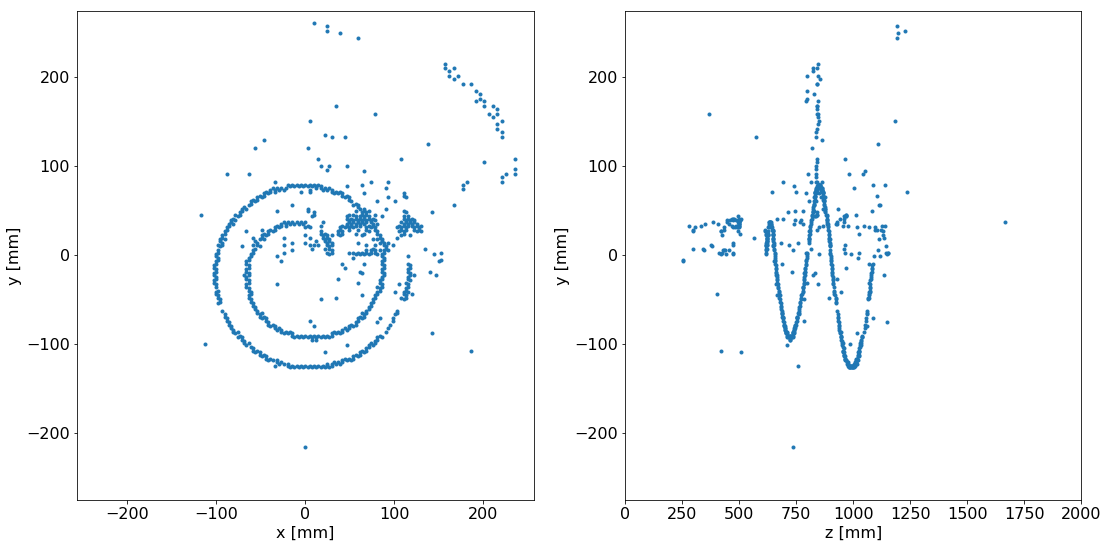

In [104]:
# font = {'family' : 'normal',
#         'weight' : 'regular',
#         'size'   : 16}

# matplotlib.rc('font', **font)

#i += 1

print(p_indices[i])
#specific event
evt = file[p_indices[i]]

xyzs = evt.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)
#xyzs = evt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

fig, ax = plt.subplots(1, 2, figsize=(18, 9))

#fig.suptitle("Run 0130 - Event 83")

ax[0].plot(xyzs[:,0], xyzs[:,1], '.')
ax[0].axis('equal')
        
ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('y [mm]')
#ax[0].set_title('xy')
ax[0].set_xlim((-275, 275))
ax[0].set_ylim((-275, 275))

#######################################################################################################################
ax[1].plot(xyzs[:,2], xyzs[:,1], '.')
#ax[1].axis('equal')
        
ax[1].set_xlabel('z [mm]')
ax[1].set_ylabel('y [mm]')
#ax[1].set_title('zy')
ax[1].set_xlim((0, 2000))
ax[1].set_ylim((-275, 275))

#fig.savefig('../../plots/results/thesis/noise_run_0130_evt_83.png')

#######################################################################################################################


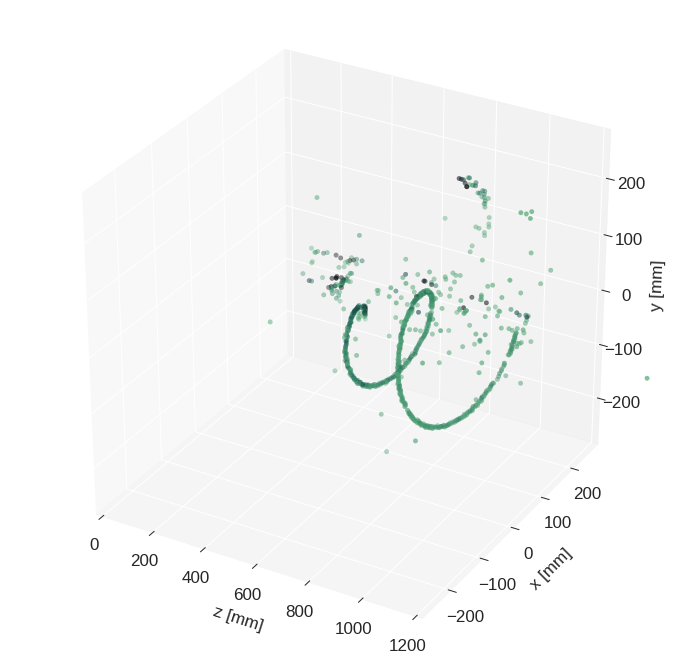

In [191]:
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["axes.titlesize"] = 17
plt.rcParams["xtick.labelsize"] = 17
plt.rcParams["ytick.labelsize"] = 17

import seaborn as sns
# Define colormaps for the plots
pad_colors = sns.cubehelix_palette(n_colors=6, start=0, rot=-0.4,
                                   gamma=1, hue=0.8, light=0.95, dark=0.15)
pad_cm = sns.blend_palette(pad_colors, as_cmap=True)
"""The color map for the `pad_plot` function."""

ch_colors = sns.cubehelix_palette(n_colors=6, start=0, rot=-0.4, gamma=2.0, hue=1, light=0.75, dark=0.05)
ch_cm = sns.blend_palette(ch_colors, as_cmap=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
plt.gca().patch.set_facecolor('white')

charge = xyzs[:, 3]

ax.scatter(xyzs[:,2], xyzs[:,0], xyzs[:,1], cmap=ch_cm, c=charge)
#ax.axis('equal')
ax.set_xlim(0., 1200.)
ax.set_ylim(-275., 275.)
ax.set_zlim(-275., 275.)

ax.set_xlabel('\n\n z [mm]')
ax.set_ylabel('\n\n x [mm]')
ax.set_zlabel('\n\n y [mm]')

#lt.savefig('../../plots/results/thesis/evt_83_run_0130_3D.pdf')

15
18
25
36
37
42
106
217
240
246
264
454


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


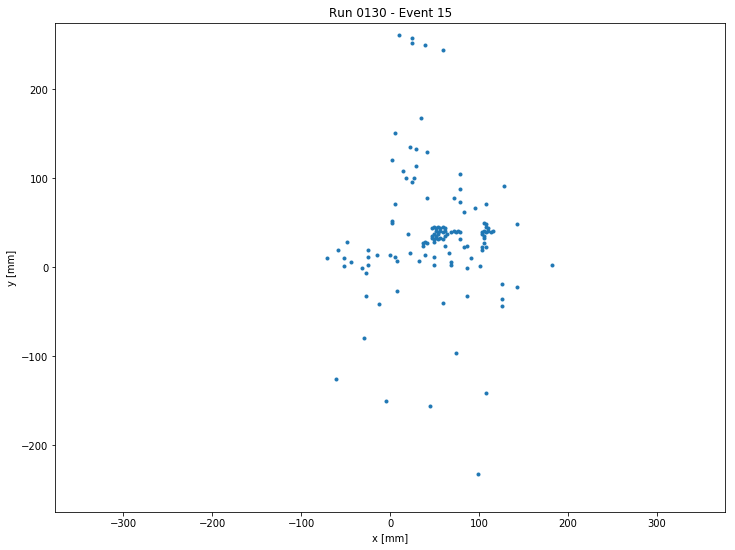

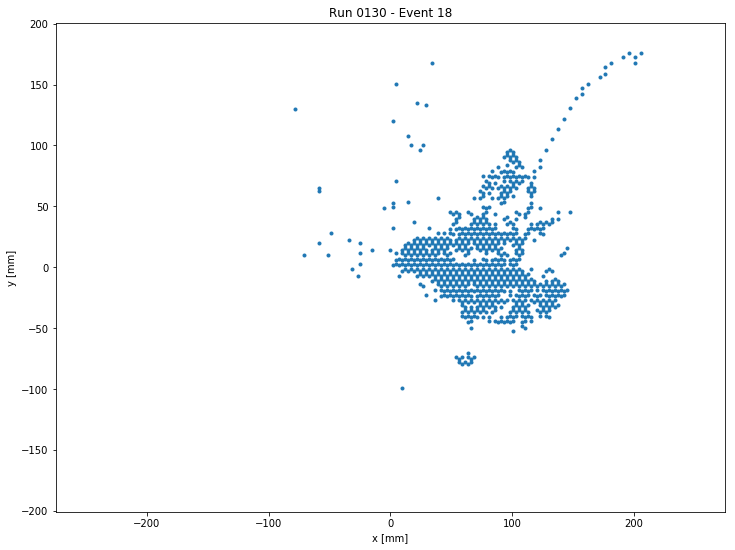

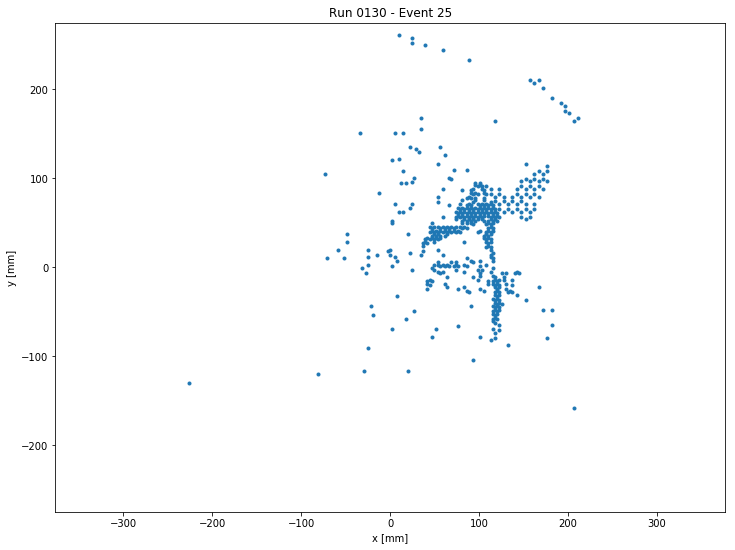

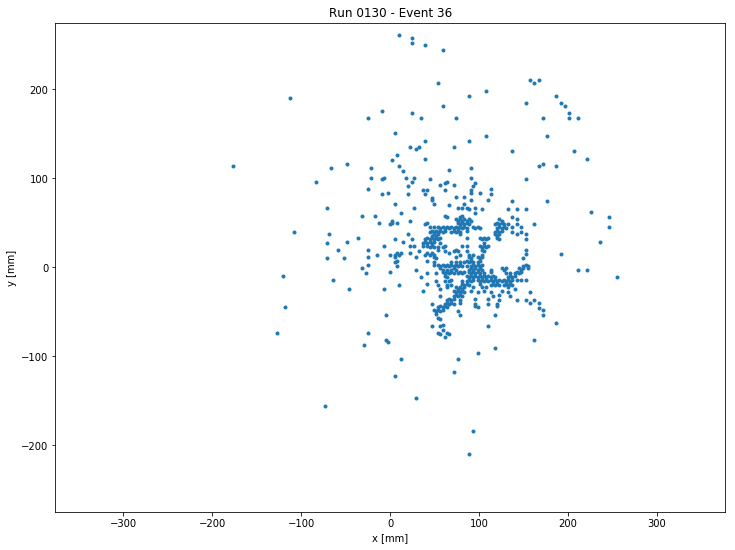

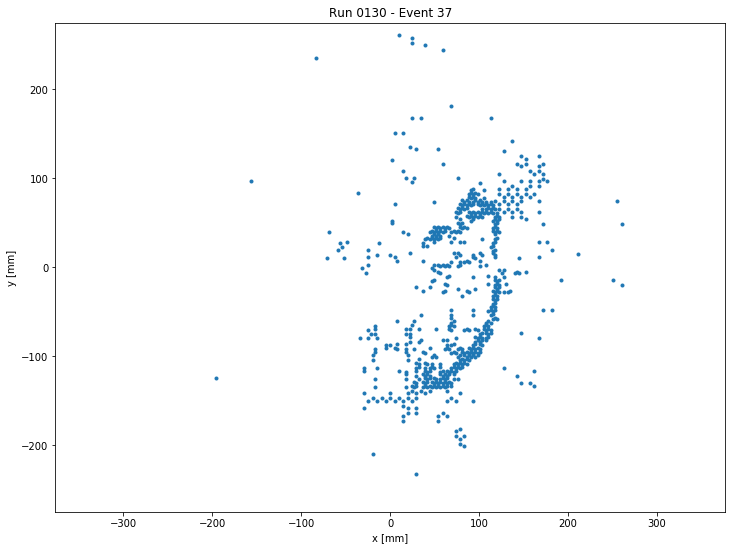

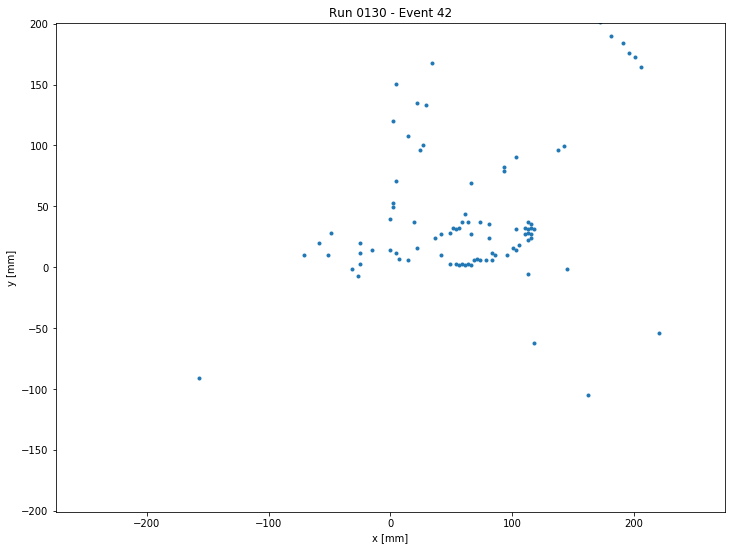

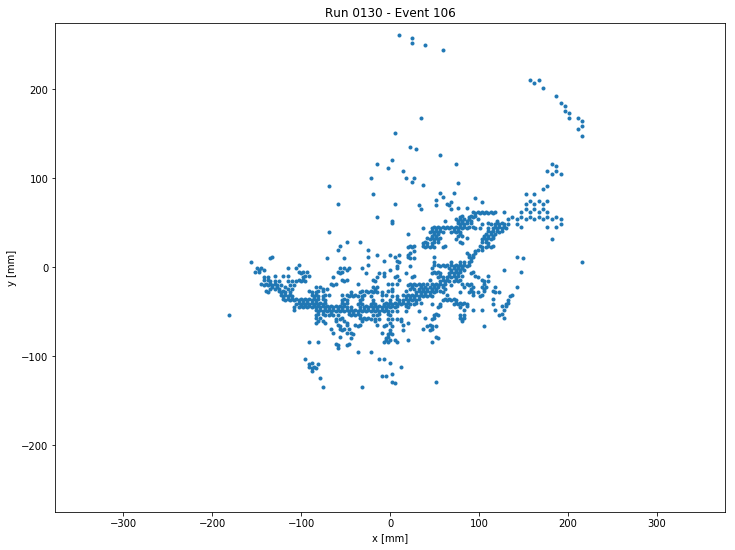

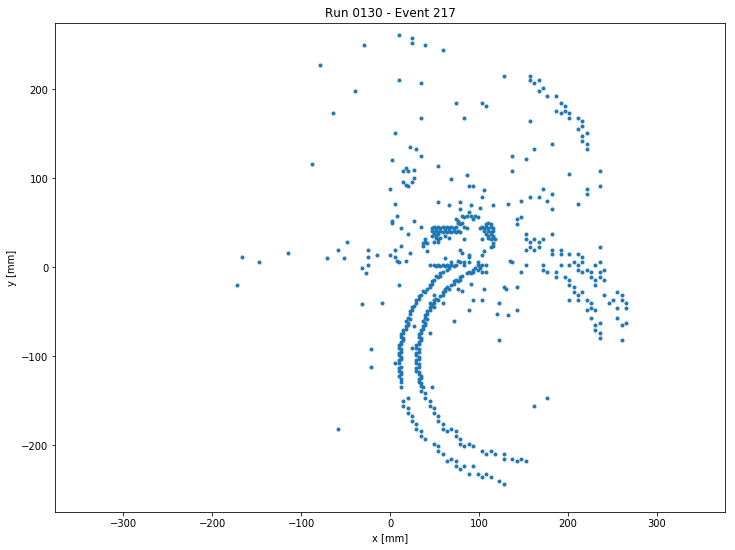

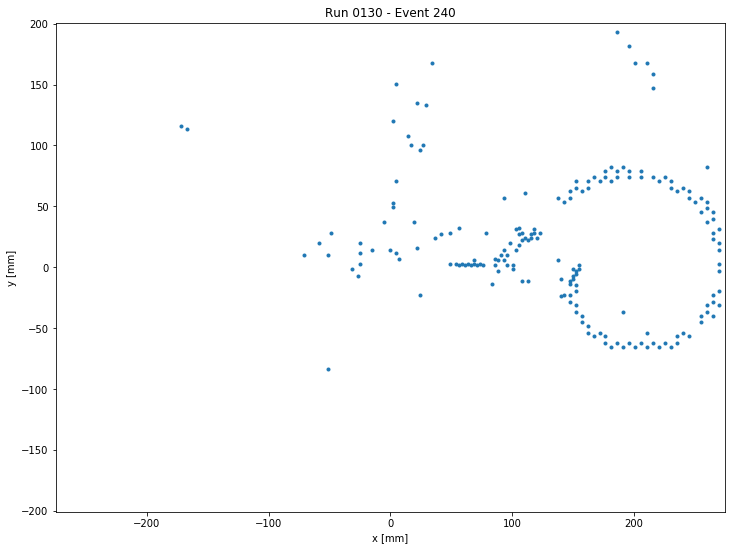

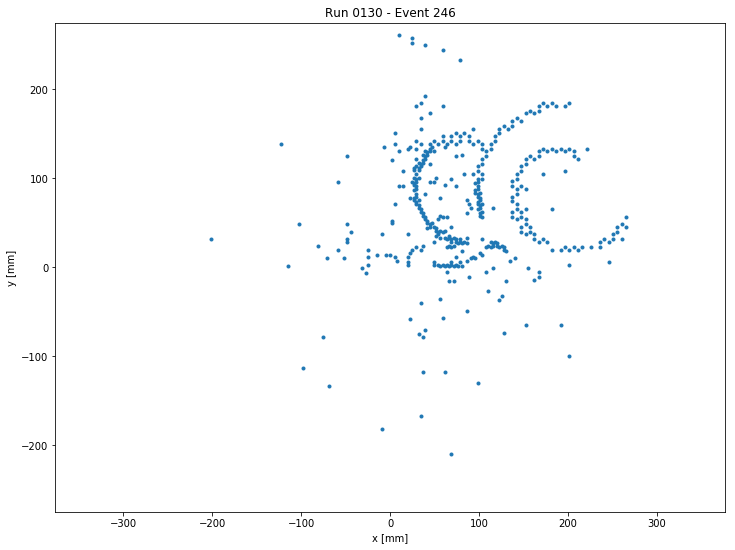

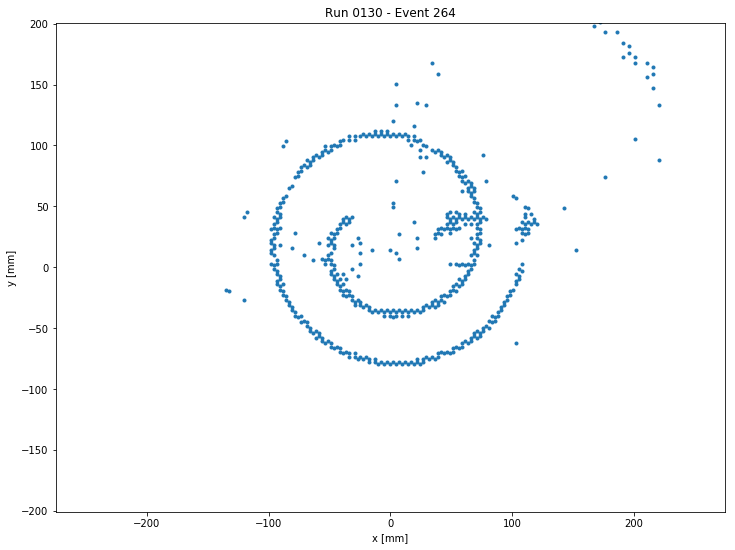

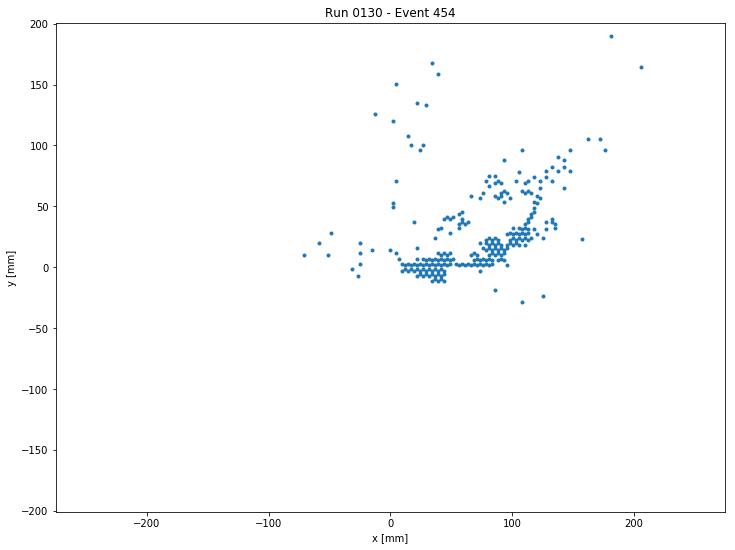

In [78]:
# import matplotlib
# font = {'family' : 'normal',
#         'weight' : 'regular',
#         'size'   : 24}

# matplotlib.rc('font', **font)

evtIDs = [15, 18, 25, 36, 37, 42, 106, 217, 240, 246, 264, 454]

for i in evtIDs:
    print(i)
    #specific event
    evt = file[i]

    #xyzs = evt.xyzs(peaks_only=True, drift_vel=np.array([-0.0603573 , -0.55178666, -5.14005679]), clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)
    xyzs = evt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    ax.plot(xyzs[:,0], xyzs[:,1], '.')
    ax.axis('equal')
        
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('y [mm]')
    ax.set_title('Run 0130 - Event ' + str(i))
    ax.set_xlim((-275, 275))
    ax.set_ylim((-275, 275))

    #plt.savefig('../../plots/events/event_examples/largerfont/run_0130_evt_' + str(i) + '.pdf')

In [81]:
evt = file[p_indices[1]]

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


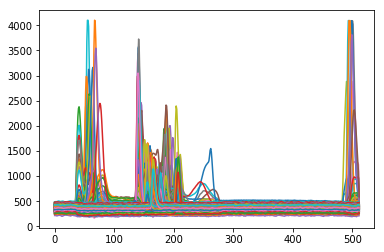

In [82]:
for trace in evt.traces['data']:
    plt.plot(trace)
    #print(len(trace))

(250, 1600)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


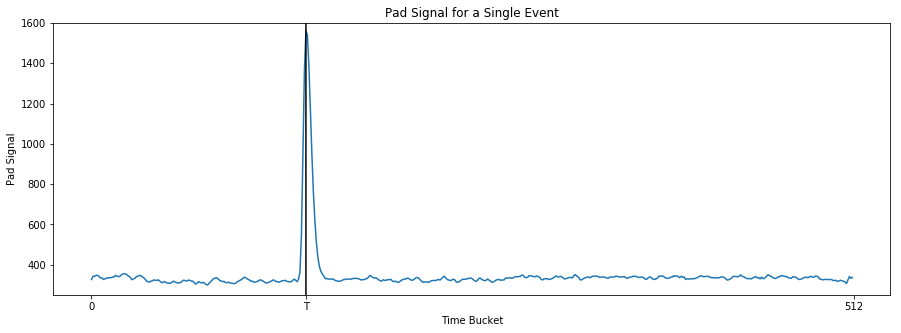

In [83]:
# font = {'family' : 'normal',
#         'weight' : 'regular',
#         'size'   : 16}

# matplotlib.rc('font', **font)

plt.figure(figsize = (15,5))
trace = evt.traces['data'][0]
plt.plot(trace)
peakIndex = int(np.where(trace == max(trace))[0])

plt.xlabel('Time Bucket')
plt.ylabel('Pad Signal')
plt.title('Pad Signal for a Single Event')

line = range(200, max(trace) + 100)
plt.plot([peakIndex]*len(line), line, c='black')

plt.xticks([0, peakIndex, 512], ['0', 'T', '512'])

plt.ylim(250, 1600)

#plt.savefig('../../plots/results/thesis/padSignal.png')